In [99]:
origin_revenue = imports_df.groupby(by=['origin']).sum()[
    'total_value'].sort_values(ascending=False)
origin_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().head()
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
%matplotlib inline


# Data Exploration

In [100]:
# Load the CSV into a DataFrame
synergy_l_data = pd.read_csv("synergy_logistics_database.csv")

In [101]:
print(import_destinations, export_destinations)
synergy_l_data.head()

['China', 'Japan', 'USA', 'Mexico', 'Germany', 'Singapore', 'South Korea'] ['Mexico', 'USA', 'Belgium', 'Germany', 'China', 'Japan', 'United Kingdom', 'Brazil', 'South Korea', 'Vietnam', 'Italy', 'Spain']


,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [102]:
# Get some info from the DataFrame
synergy_l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   register_id     19056 non-null  int64 
 1   direction       19056 non-null  object
 2   origin          19056 non-null  object
 3   destination     19056 non-null  object
 4   year            19056 non-null  int64 
 5   date            19056 non-null  object
 6   product         19056 non-null  object
 7   transport_mode  19056 non-null  object
 8   company_name    19056 non-null  object
 9   total_value     19056 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [103]:
# Just to make sure all of the data is complete
pd.isnull(synergy_l_data).any()

register_id       False
direction         False
origin            False
destination       False
year              False
date              False
product           False
transport_mode    False
company_name      False
total_value       False
dtype: bool

# Option 1 - Top Routes

In [104]:
# temp = synergy_l_data[['origin','destination']].drop_duplicates()
unique_routes = synergy_l_data.pivot_table(columns=['origin','destination'], aggfunc='size')
sorted_routes = unique_routes.sort_values(ascending=False)
sorted_routes

origin       destination
South Korea  Vietnam        497
Netherlands  Belgium        437
USA          Netherlands    436
Japan        Mexico         385
China        Mexico         351
                           ... 
France       Russia          13
Japan        India            8
France       Austria          7
Brazil       Germany          6
Malaysia     Singapore        4
Length: 172, dtype: int64

In [105]:
total_deliveries = synergy_l_data.shape[0]
tmp_top_routes = {'route': [], 'count': []}
total = 0
for index, ((origin, destination), count) in enumerate(sorted_routes.items()):
    if index < 20:
        tmp_top_routes['route'].append(f'{origin} - {destination}')
        tmp_top_routes['count'].append(count)
    if index > 10:
        total += count
tmp_top_routes['route'].append('Average after the top 10')
tmp_top_routes['count'].append(total/len(sorted_routes))

In [106]:
top_routes = pd.DataFrame(tmp_top_routes,columns=['route','count'])
top_routes.tail()

,route,count
16,Netherlands - France,239.000000
17,Germany - USA,236.000000
18,Germany - Mexico,231.000000
19,United Kingdom - Belgium,229.000000
20,Average after the top 10,87.831395


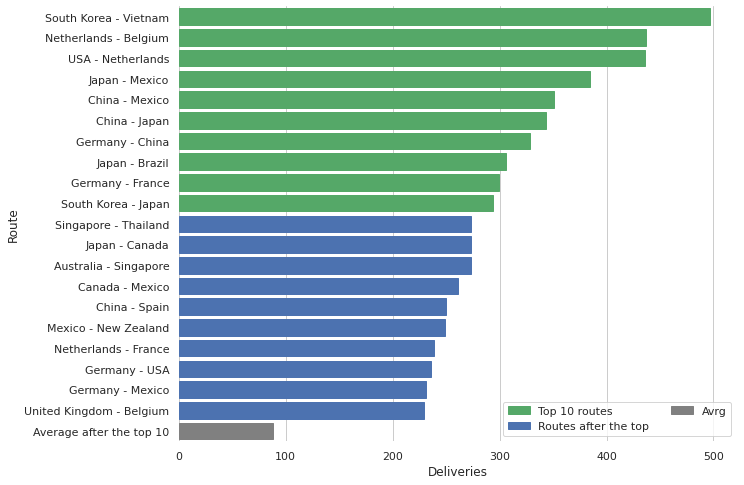

In [107]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8))

sns.barplot(y="route", x="count", data=top_routes)

top = 10
for index, bar in enumerate(ax.patches):
    if index == 0:
        bar.set_label(f'Top {top} routes')
    if index == top:
        bar.set_label(f'Routes after the top')

    if index < top:
        bar.set_color('g')
    elif index == len(ax.patches) - 1:
        bar.set_color('gray')
        bar.set_label(f'Avrg')
    else:
        bar.set_color('b')

ax.set(ylabel="Route", xlabel="Deliveries")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

# Option 2 - Transport Performance

In [108]:
transport_revenue = synergy_l_data.groupby(by=['transport_mode']).sum()['total_value'].sort_values(ascending=False)
transport_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().T

transport_mode,Sea,Rail,Air,Road
total_value,"$100,530,622.00k","$43,628,043.00k","$38,262,147.00k","$33,270,486.00k"


Text(0.5, 1.0, 'Total Revenue % per Transport Mode')

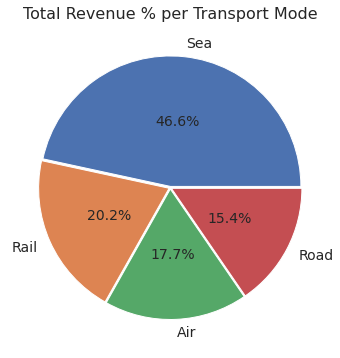

In [139]:
pie, ax = plt.subplots(figsize=[10,6])
labels = transport_revenue.keys()
plt.rcParams.update({'font.size': 14})
plt.pie(x=transport_revenue, autopct="%.1f%%", explode=[0.01]*4, labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
plt.title("Total Revenue % per Transport Mode", fontsize=16)

# Option 3 - Revenue from Imports and Exports

In [110]:
imports_df = synergy_l_data[synergy_l_data['direction'] == 'Imports']
exports_df = synergy_l_data[synergy_l_data['direction'] == 'Exports']
total_import_revenue = imports_df['total_value'].sum()
total_export_revenue = exports_df['total_value'].sum()
print(f'Import Revenue: {total_import_revenue}, Export Revenue: {total_export_revenue}')

Import Revenue: 55528000000, Export Revenue: 160163298000


In [111]:
origin_revenue = imports_df.groupby(by=['origin']).sum()['total_value'].sort_values(ascending=False)
origin_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().head()

,total_value
origin,
China,"$12,233,000.00k"
Japan,"$8,094,000.00k"
USA,"$5,291,000.00k"
Mexico,"$4,621,000.00k"
Germany,"$4,250,000.00k"


In [112]:
revenue_sum = 0
max_total = total_import_revenue * .8
import_destinations = []
for destination, val in origin_revenue.items():
    revenue_sum += val
    if revenue_sum >= max_total:
        break
    import_destinations.append(destination)

In [113]:
destiny_revenue = exports_df.groupby(by=['destination']).sum()['total_value'].sort_values(ascending=False)
destiny_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().head()

,total_value
destination,
Mexico,"$28,315,015.00k"
USA,"$13,159,409.00k"
Belgium,"$13,099,380.00k"
Germany,"$11,303,451.00k"
China,"$11,259,992.00k"


In [114]:
revenue_sum = 0
max_total = total_export_revenue * .8
export_destinations = []
for destination, val in destiny_revenue.items():
    revenue_sum += val
    if revenue_sum >= max_total:
        break
    export_destinations.append(destination)
    

In [115]:
print(import_destinations, export_destinations)

['China', 'Japan', 'USA', 'Mexico', 'Germany', 'Singapore', 'South Korea'] ['Mexico', 'USA', 'Belgium', 'Germany', 'China', 'Japan', 'United Kingdom', 'Brazil', 'South Korea', 'Vietnam', 'Italy', 'Spain']


In [116]:
origin_revenue = origin_revenue.to_frame()
origin_revenue["percentage"] = origin_revenue.cumsum() / total_import_revenue * 100

/tmp/ipykernel_16723/3223778058.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(origin_revenue.index, rotation = 65)


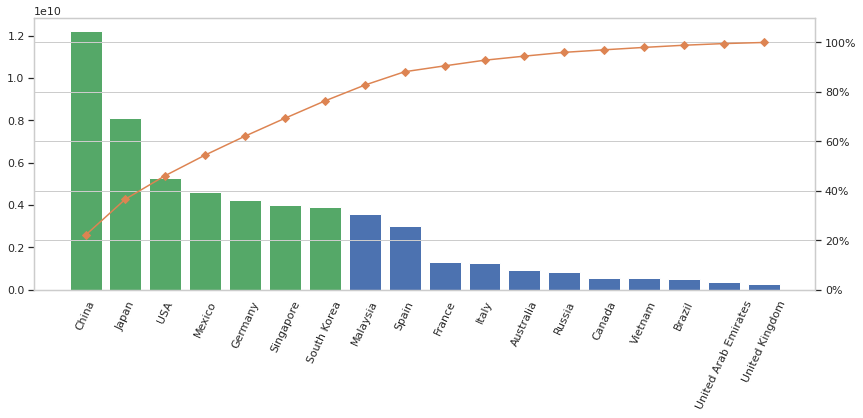

In [141]:
fig, ax1 = plt.subplots(figsize=(14, 5))

colors = []
for origin in origin_revenue.index:
    if origin in import_destinations:
        colors.append('g')
    else:
        colors.append('b')
ax1.bar(origin_revenue.index, origin_revenue["total_value"], color=colors)
ax1.grid(False)
ax2 = ax1.twinx()
ax2.grid(True)
ax2.plot(origin_revenue.index, origin_revenue["percentage"], color="C1", marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(bottom=0, top=110)

ax1.set_xticklabels(origin_revenue.index, rotation = 65)
plt.show()